In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import f1_score, confusion_matrix, classification_report


from category_encoders import TargetEncoder
from sklearn.preprocessing import LabelEncoder,RobustScaler
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import svm


In [84]:
### fun
# Calculate counts
def analyze(data,cols_a,cols_b):
    df_temp = data.groupby([cols_a,cols_b]).size().reset_index(name='count')

    # Set Index
    df_temp = df_temp.set_index([cols_a, cols_b])

    # Calculate Proportion of grade
    df_temp = df_temp.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()

    # Plot chart
    plt.figure(figsize=(12,5))
    ax = sns.barplot(data = df_temp, 
                    x = cols_a, 
                    y = 'count', 
                    hue = cols_b)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
    plt.title("Distribution ")
    plt.xlabel(f"{cols_a}")
    plt.ylabel(f"{cols_b}")
    plt.show()

    # Clean up
    del df_temp, ax

In [85]:
def cross_validation(X,y,model):
    f1 = []
    conv = []
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        f1_macro = f1_score(y_test, y_pred, average = 'macro')
       
        f1.append(f1_macro)
        #conv.append(confusion_matrix(y_test, y_pred))
        print(f'here is the : {f1_macro}')
        print(classification_report(y_test, y_pred))
        print("==="*20)
    return f1, conv

In [86]:
train = pd.read_csv("../data/preprocess/train_2.csv")
test  = pd.read_csv("../data/preprocess/test_2.csv")
train = train.iloc[:,2:]
test = test.iloc[:,2:]

/var/folders/yt/n9_2kr5s6nx_5b2y_kx3mnnm0000gn/T/ipykernel_76489/3530008456.py:1: DtypeWarning: Columns (6,7,8,9,10,11,12,13,14,17,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("../data/preprocess/train_2.csv")


analisis test

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


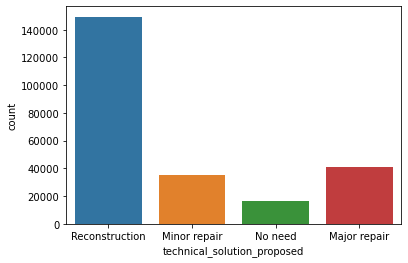

In [87]:
sns.countplot(test['technical_solution_proposed'])

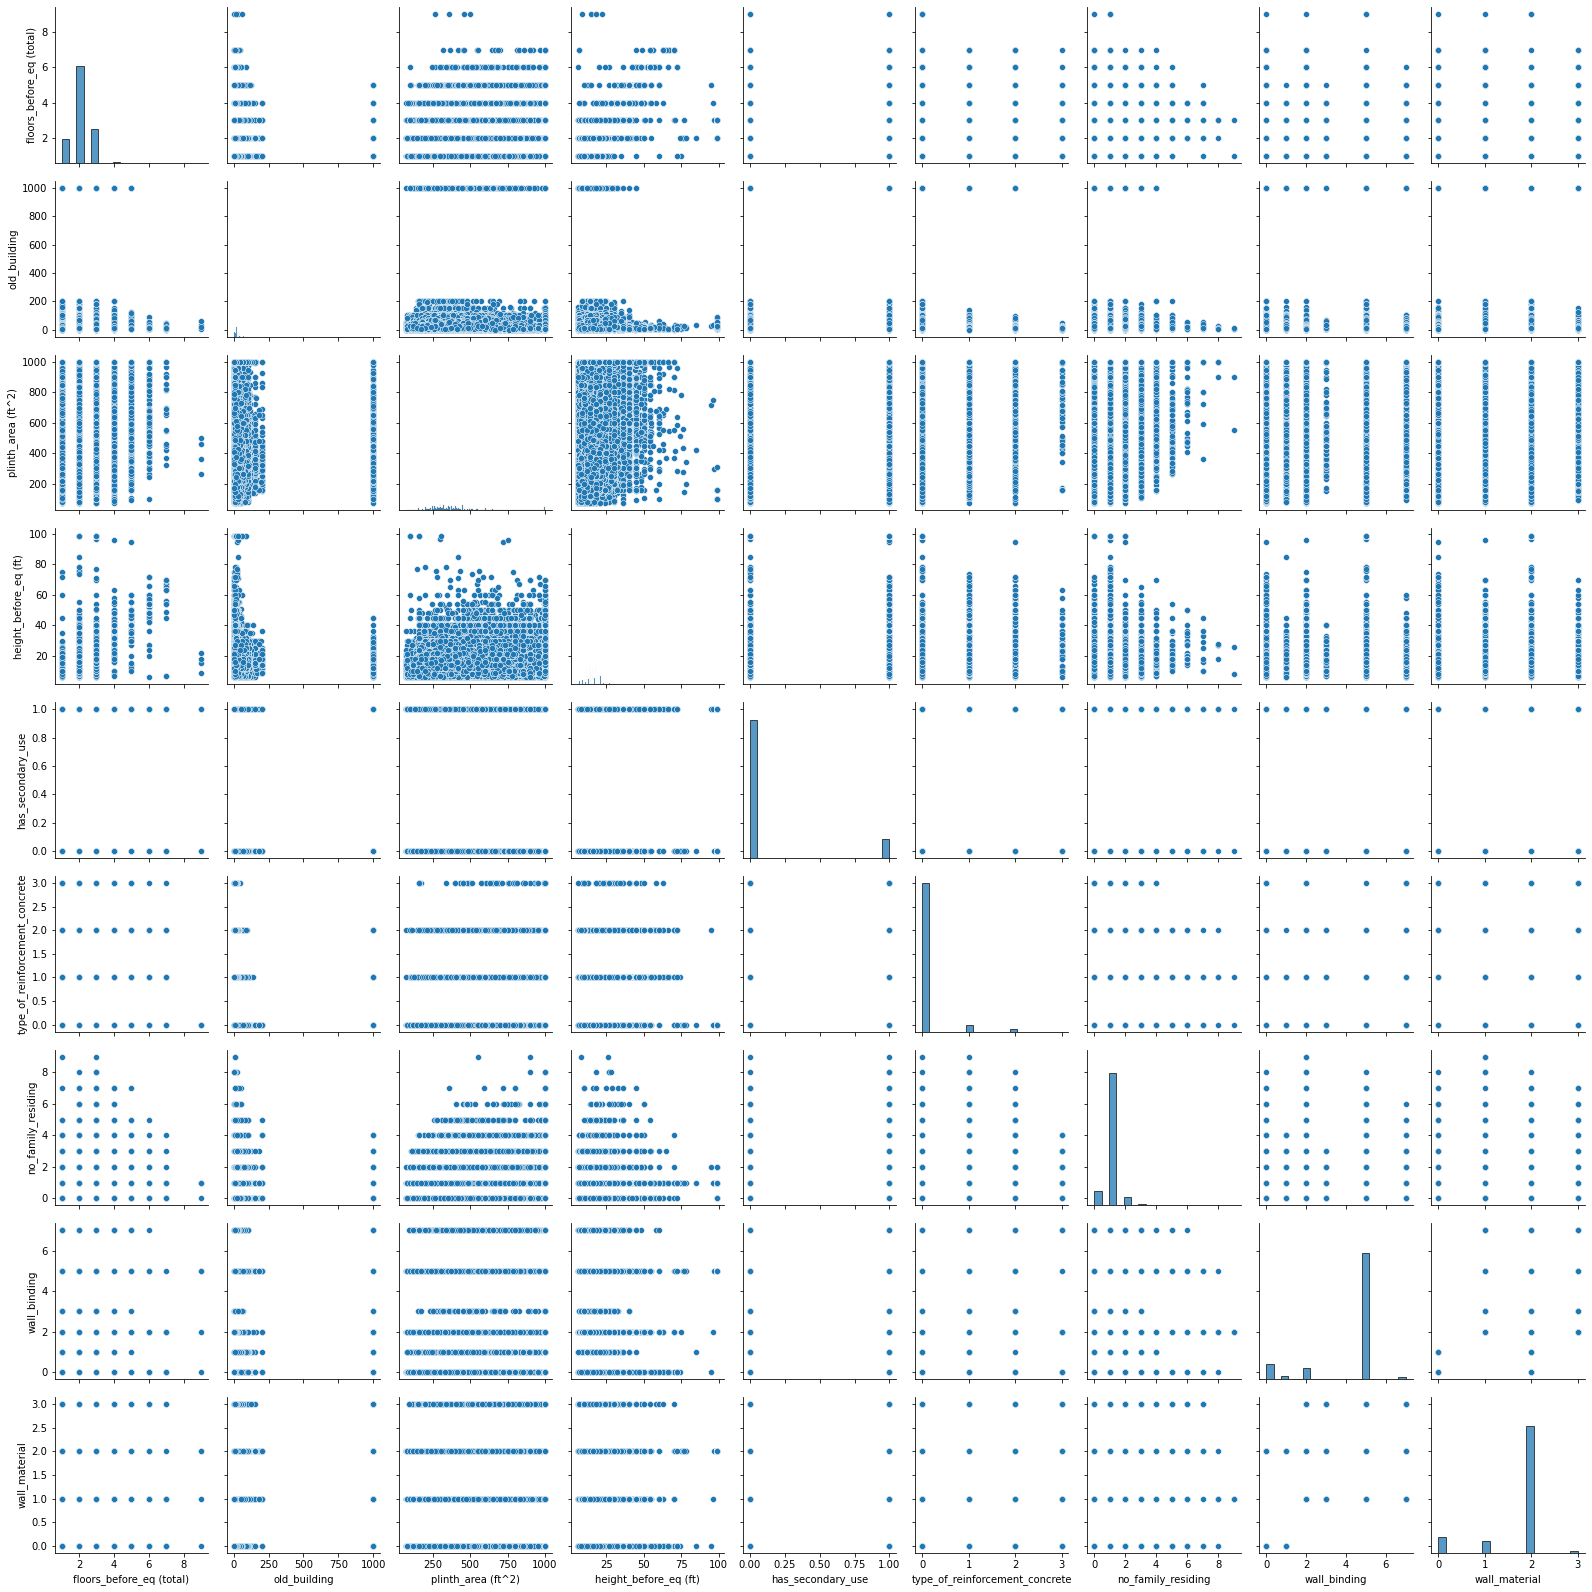

In [88]:
sns.pairplot(test)

In [89]:
test.columns

Index(['floors_before_eq (total)', 'old_building', 'plinth_area (ft^2)',
       'height_before_eq (ft)', 'land_surface_condition', 'type_of_foundation',
       'type_of_roof', 'type_of_ground_floor', 'type_of_other_floor',
       'position', 'building_plan_configuration',
       'technical_solution_proposed', 'legal_ownership_status',
       'has_secondary_use', 'type_of_reinforcement_concrete',
       'residential_type', 'no_family_residing', 'public_place_type',
       'industrial_use_type', 'govermental_use_type',
       'flexible_superstructure', 'wall_binding', 'wall_material'],
      dtype='object')

/var/folders/yt/n9_2kr5s6nx_5b2y_kx3mnnm0000gn/T/ipykernel_76489/1307814918.py:10: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_temp = df_temp.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()


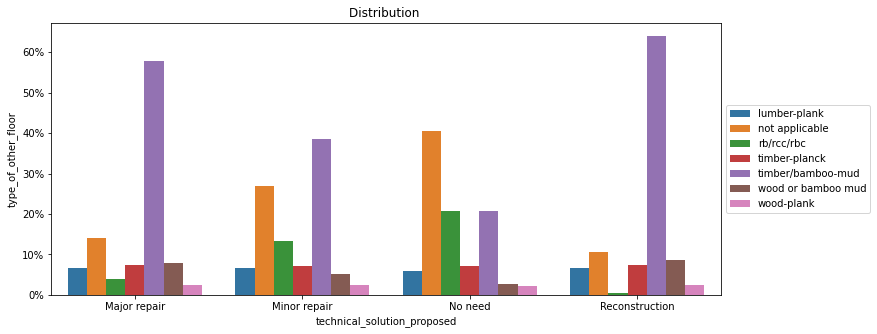

In [90]:
analyze(test,'technical_solution_proposed','type_of_other_floor')

/var/folders/yt/n9_2kr5s6nx_5b2y_kx3mnnm0000gn/T/ipykernel_76489/1307814918.py:10: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_temp = df_temp.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()


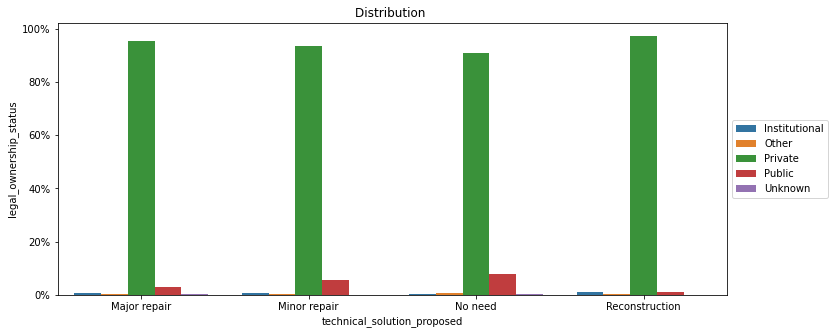

In [91]:
analyze(test,'technical_solution_proposed','legal_ownership_status')

/var/folders/yt/n9_2kr5s6nx_5b2y_kx3mnnm0000gn/T/ipykernel_76489/1307814918.py:10: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_temp = df_temp.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()


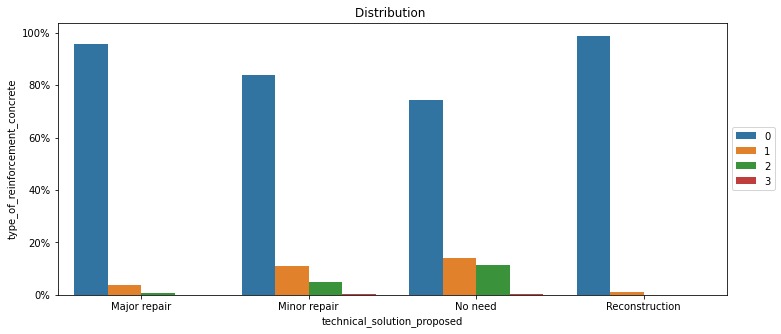

In [92]:
analyze(test,'technical_solution_proposed','type_of_reinforcement_concrete')

/var/folders/yt/n9_2kr5s6nx_5b2y_kx3mnnm0000gn/T/ipykernel_76489/1307814918.py:10: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_temp = df_temp.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()


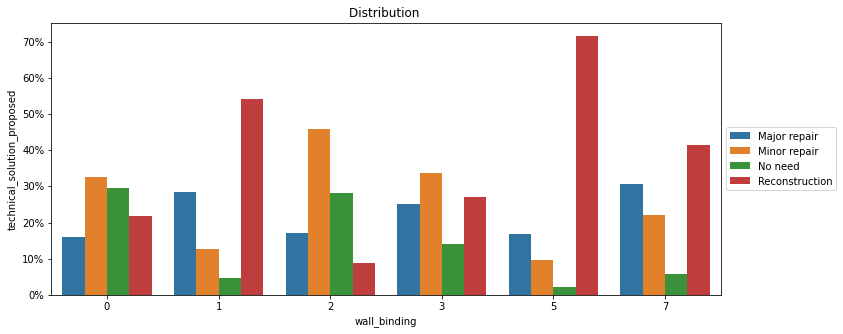

In [93]:
analyze(test,'wall_binding','technical_solution_proposed')

In [94]:
train.corr()

/var/folders/yt/n9_2kr5s6nx_5b2y_kx3mnnm0000gn/T/ipykernel_76489/2189804198.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,floors_before_eq (total),old_building,plinth_area (ft^2),height_before_eq (ft),has_secondary_use,type_of_reinforcement_concrete,no_family_residing,wall_binding,wall_material,damage_grade
floors_before_eq (total),1.000000,0.046968,0.113619,0.709187,0.064786,0.054357,0.087184,0.184112,0.150524,0.188299
old_building,0.046968,1.000000,-0.011271,0.036067,0.000082,-0.037395,0.005527,0.048440,0.043108,0.052824
plinth_area (ft^2),0.113619,-0.011271,1.000000,0.210972,0.127675,0.324098,0.116108,-0.185567,-0.165886,-0.166830
height_before_eq (ft),0.709187,0.036067,0.210972,1.000000,0.114538,0.178451,0.065304,0.048883,0.032805,0.055909
has_secondary_use,0.064786,0.000082,0.127675,0.114538,1.000000,0.171016,-0.049825,-0.100263,-0.082801,-0.094684
type_of_reinforcement_concrete,0.054357,-0.037395,0.324098,0.178451,0.171016,1.000000,0.006438,-0.390317,-0.367268,-0.294321
no_family_residing,0.087184,0.005527,0.116108,0.065304,-0.049825,0.006438,1.000000,0.012605,0.012012,0.049127
wall_binding,0.184112,0.048440,-0.185567,0.048883,-0.100263,-0.390317,0.012605,1.000000,0.875699,0.445816
wall_material,0.150524,0.043108,-0.165886,0.032805,-0.082801,-0.367268,0.012012,0.875699,1.000000,0.441532
damage_grade,0.188299,0.052824,-0.166830,0.055909,-0.094684,-0.294321,0.049127,0.445816,0.441532,1.000000


In [95]:
train = train.copy().dropna(thresh=24)
train.isna().sum()

floors_before_eq (total)          0
old_building                      0
plinth_area (ft^2)                0
height_before_eq (ft)             0
land_surface_condition            0
type_of_foundation                0
type_of_roof                      0
type_of_ground_floor              0
type_of_other_floor               0
position                          0
building_plan_configuration       0
technical_solution_proposed       0
legal_ownership_status            0
has_secondary_use                 0
type_of_reinforcement_concrete    0
residential_type                  0
no_family_residing                0
public_place_type                 0
industrial_use_type               0
govermental_use_type              0
flexible_superstructure           0
wall_binding                      0
wall_material                     0
damage_grade                      0
dtype: int64

In [96]:
X = train.iloc[:,:-1]
y = train.iloc[:,-1]

In [97]:
cat_features = X .select_dtypes(include='object').columns.tolist()
cols_var = [i for i in X.columns if i not in cat_features]

In [98]:
one_hot_encoded = pd.get_dummies(X[cat_features])
tmp = pd.concat([one_hot_encoded,X[cols_var]],axis=1)
cross_validation(tmp,y,RandomForestClassifier(random_state=0))

here is the : 0.6570121127377433
              precision    recall  f1-score   support

         1.0       0.85      0.70      0.77       969
         2.0       0.68      0.75      0.71      1063
         3.0       0.78      0.75      0.77      1689
         4.0       0.43      0.29      0.35      2247
         5.0       0.62      0.77      0.69      3393

    accuracy                           0.64      9361
   macro avg       0.67      0.65      0.66      9361
weighted avg       0.63      0.64      0.63      9361

here is the : 0.657927538780853
              precision    recall  f1-score   support

         1.0       0.87      0.74      0.80       968
         2.0       0.69      0.75      0.72      1063
         3.0       0.75      0.73      0.74      1689
         4.0       0.42      0.29      0.34      2247
         5.0       0.62      0.77      0.69      3393

    accuracy                           0.64      9360
   macro avg       0.67      0.66      0.66      9360
weighted avg

([0.6570121127377433,
  0.657927538780853,
  0.6586295867031319,
  0.665709798343389,
  0.662205819756241],
 [])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


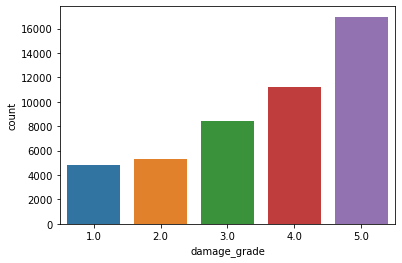

In [99]:
sns.countplot(y)

In [100]:
model = RandomForestClassifier(random_state=0)

In [101]:
model.fit(tmp,y)

RandomForestClassifier(random_state=0)

In [102]:
tmp

,land_surface_condition_Flat,land_surface_condition_Moderate slope,land_surface_condition_Steep slope,type_of_foundation_bamboo/timber,type_of_foundation_cement-stone/brick,type_of_foundation_clay mortar-stone/brick,type_of_foundation_mud mortar-stone/brick,type_of_foundation_other,type_of_foundation_rc,type_of_roof_bamboo/timber heavy roof,...,flexible_superstructure_unavailable,floors_before_eq (total),old_building,plinth_area (ft^2),height_before_eq (ft),has_secondary_use,type_of_reinforcement_concrete,no_family_residing,wall_binding,wall_material
21,0,1,0,0,0,1,0,0,0,0,...,1,1.0,22.0,300.0,10.0,0.0,0.0,0.0,5.0,2.0
27,1,0,0,0,0,1,0,0,0,0,...,1,3.0,22.0,360.0,18.0,0.0,0.0,1.0,5.0,2.0
43,1,0,0,0,0,1,0,0,0,0,...,1,2.0,8.0,380.0,17.0,0.0,0.0,1.0,5.0,2.0
46,1,0,0,0,0,1,0,0,0,0,...,1,2.0,22.0,250.0,14.0,0.0,0.0,0.0,5.0,2.0
92,1,0,0,0,0,1,0,0,0,0,...,0,2.0,7.0,312.0,13.0,0.0,0.0,1.0,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519918,1,0,0,0,0,1,0,0,0,1,...,1,2.0,8.0,547.0,17.0,0.0,0.0,2.0,5.0,2.0
519956,1,0,0,0,0,1,0,0,0,0,...,1,1.0,24.0,234.0,10.0,0.0,0.0,1.0,5.0,2.0
519969,1,0,0,0,0,1,0,0,0,0,...,1,2.0,10.0,415.0,16.0,0.0,0.0,1.0,5.0,2.0
519980,1,0,0,0,0,1,0,0,0,0,...,1,3.0,85.0,410.0,22.0,0.0,0.0,1.0,5.0,2.0


In [103]:
one_hot_encoded = pd.get_dummies(test[cat_features])
tmp_test = pd.concat([one_hot_encoded,test[cols_var]],axis=1)

In [104]:
y_pred = model.predict(tmp_test)

In [105]:
submit = pd.DataFrame(y_pred,index=test.index,columns=['damage_grade'])
submit['damage_grade'] = submit['damage_grade'].astype(int)
submit['id'] = test.index
submit = submit[['id','damage_grade']]
submit.to_csv('first submit.csv',index=False)

In [106]:
tmp = pd.concat([tmp,y],axis=1)
tmp.to_csv('../data/preprocess/train_3.csv')
tmp_test.to_csv('../data/preprocess/test_3.csv')

### new runtime

In [107]:
train

,floors_before_eq (total),old_building,plinth_area (ft^2),height_before_eq (ft),land_surface_condition,type_of_foundation,type_of_roof,type_of_ground_floor,type_of_other_floor,position,...,type_of_reinforcement_concrete,residential_type,no_family_residing,public_place_type,industrial_use_type,govermental_use_type,flexible_superstructure,wall_binding,wall_material,damage_grade
21,1.0,22.0,300.0,10.0,Moderate slope,clay mortar-stone/brick,bamboo/timber light roof,mud,not applicable,Not attached,...,0.0,Non-residential,0.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5.0
27,3.0,22.0,360.0,18.0,Flat,clay mortar-stone/brick,wood light roof or bamboo heavy roof,clay,timber/bamboo-mud,Not attached,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,4.0
43,2.0,8.0,380.0,17.0,Flat,clay mortar-stone/brick,wood light roof or bamboo light roof,brick/stone,timber-planck,Not attached,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5.0
46,2.0,22.0,250.0,14.0,Flat,clay mortar-stone/brick,bamboo/timber light roof,clay,timber/bamboo-mud,Not attached,...,0.0,Non-residential,0.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5.0
92,2.0,7.0,312.0,13.0,Flat,clay mortar-stone/brick,bamboo/timber light roof,clay,timber/bamboo-mud,Not attached,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,available,5.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519918,2.0,8.0,547.0,17.0,Flat,clay mortar-stone/brick,bamboo/timber heavy roof,clay,timber/bamboo-mud,Attached-1 side,...,0.0,Non-residential,2.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5.0
519956,1.0,24.0,234.0,10.0,Flat,clay mortar-stone/brick,bamboo/timber light roof,clay,not applicable,Not attached,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5.0
519969,2.0,10.0,415.0,16.0,Flat,clay mortar-stone/brick,bamboo/timber light roof,clay,timber/bamboo-mud,Not attached,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5.0
519980,3.0,85.0,410.0,22.0,Flat,clay mortar-stone/brick,bamboo/timber light roof,clay,timber/bamboo-mud,Not attached,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,4.0


In [141]:

train  = pd.read_csv('../data/preprocess/train_3.csv')
test  = pd.read_csv('../data/preprocess/test_3.csv')

In [142]:
train

,Unnamed: 0,land_surface_condition_Flat,land_surface_condition_Moderate slope,land_surface_condition_Steep slope,type_of_foundation_bamboo/timber,type_of_foundation_cement-stone/brick,type_of_foundation_clay mortar-stone/brick,type_of_foundation_mud mortar-stone/brick,type_of_foundation_other,type_of_foundation_rc,...,floors_before_eq (total),old_building,plinth_area (ft^2),height_before_eq (ft),has_secondary_use,type_of_reinforcement_concrete,no_family_residing,wall_binding,wall_material,damage_grade
0,21,0,1,0,0,0,1,0,0,0,...,1.0,22.0,300.0,10.0,0.0,0.0,0.0,5.0,2.0,5.0
1,27,1,0,0,0,0,1,0,0,0,...,3.0,22.0,360.0,18.0,0.0,0.0,1.0,5.0,2.0,4.0
2,43,1,0,0,0,0,1,0,0,0,...,2.0,8.0,380.0,17.0,0.0,0.0,1.0,5.0,2.0,5.0
3,46,1,0,0,0,0,1,0,0,0,...,2.0,22.0,250.0,14.0,0.0,0.0,0.0,5.0,2.0,5.0
4,92,1,0,0,0,0,1,0,0,0,...,2.0,7.0,312.0,13.0,0.0,0.0,1.0,5.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46796,519918,1,0,0,0,0,1,0,0,0,...,2.0,8.0,547.0,17.0,0.0,0.0,2.0,5.0,2.0,5.0
46797,519956,1,0,0,0,0,1,0,0,0,...,1.0,24.0,234.0,10.0,0.0,0.0,1.0,5.0,2.0,5.0
46798,519969,1,0,0,0,0,1,0,0,0,...,2.0,10.0,415.0,16.0,0.0,0.0,1.0,5.0,2.0,5.0
46799,519980,1,0,0,0,0,1,0,0,0,...,3.0,85.0,410.0,22.0,0.0,0.0,1.0,5.0,2.0,4.0


In [143]:
cols_var, cat_features

(['floors_before_eq (total)',
  'old_building',
  'plinth_area (ft^2)',
  'height_before_eq (ft)',
  'has_secondary_use',
  'type_of_reinforcement_concrete',
  'no_family_residing',
  'wall_binding',
  'wall_material'],
 ['land_surface_condition',
  'type_of_foundation',
  'type_of_roof',
  'type_of_ground_floor',
  'type_of_other_floor',
  'position',
  'building_plan_configuration',
  'technical_solution_proposed',
  'legal_ownership_status',
  'residential_type',
  'public_place_type',
  'industrial_use_type',
  'govermental_use_type',
  'flexible_superstructure'])

In [144]:
X = train.iloc[:,1:-1]
y = train.iloc[:,-1]
transformer = RobustScaler().fit(X[cols_var])
X[cols_var] = transformer.transform(X[cols_var].copy())

In [145]:
X[cols_var]

,floors_before_eq (total),old_building,plinth_area (ft^2),height_before_eq (ft),has_secondary_use,type_of_reinforcement_concrete,no_family_residing,wall_binding,wall_material
0,-1.0,0.333333,-0.319149,-1.000000,0.0,0.0,-1.0,0.0,0.0
1,1.0,0.333333,0.000000,0.333333,0.0,0.0,0.0,0.0,0.0
2,0.0,-0.444444,0.106383,0.166667,0.0,0.0,0.0,0.0,0.0
3,0.0,0.333333,-0.585106,-0.333333,0.0,0.0,-1.0,0.0,0.0
4,0.0,-0.500000,-0.255319,-0.500000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
46796,0.0,-0.444444,0.994681,0.166667,0.0,0.0,1.0,0.0,0.0
46797,-1.0,0.444444,-0.670213,-1.000000,0.0,0.0,0.0,0.0,0.0
46798,0.0,-0.333333,0.292553,0.000000,0.0,0.0,0.0,0.0,0.0
46799,1.0,3.833333,0.265957,1.000000,0.0,0.0,0.0,0.0,0.0


In [146]:
cross_validation(X,y,RandomForestClassifier(random_state=0))

here is the : 0.6577141702379994
              precision    recall  f1-score   support

         1.0       0.85      0.71      0.77       969
         2.0       0.68      0.75      0.71      1063
         3.0       0.78      0.75      0.77      1689
         4.0       0.43      0.29      0.35      2247
         5.0       0.62      0.78      0.69      3393

    accuracy                           0.65      9361
   macro avg       0.67      0.66      0.66      9361
weighted avg       0.64      0.65      0.63      9361

here is the : 0.658841011415902
              precision    recall  f1-score   support

         1.0       0.88      0.74      0.80       968
         2.0       0.69      0.75      0.72      1063
         3.0       0.75      0.73      0.74      1689
         4.0       0.41      0.29      0.34      2247
         5.0       0.62      0.77      0.69      3393

    accuracy                           0.64      9360
   macro avg       0.67      0.66      0.66      9360
weighted avg

([0.6577141702379994,
  0.658841011415902,
  0.6591677385986608,
  0.6658404638944668,
  0.6621905092402633],
 [])

In [147]:
tmp_train = X.copy()
for c in cols_var:
    tmp_train[f'{c}_nominal'] = pd.cut(tmp_train[c], bins=5, labels=['Section 1', 'Section 2', 'Section 3', 'Section 4', 'Section 5'])

In [148]:
new_cat = tmp_train.loc[:,'floors_before_eq (total)_nominal':]
one_hot_encoded = pd.get_dummies(new_cat)
tmp_transform = pd.concat([tmp_train.loc[:,:'wall_material'],one_hot_encoded,],axis=1)

In [149]:
cross_validation(tmp_transform,y,RandomForestClassifier(random_state=0))

here is the : 0.65811377173263
              precision    recall  f1-score   support

         1.0       0.84      0.72      0.77       969
         2.0       0.68      0.74      0.71      1063
         3.0       0.78      0.75      0.76      1689
         4.0       0.44      0.30      0.36      2247
         5.0       0.62      0.77      0.69      3393

    accuracy                           0.65      9361
   macro avg       0.67      0.66      0.66      9361
weighted avg       0.64      0.65      0.63      9361

here is the : 0.6613020431565044
              precision    recall  f1-score   support

         1.0       0.87      0.75      0.80       968
         2.0       0.69      0.74      0.72      1063
         3.0       0.75      0.74      0.75      1689
         4.0       0.43      0.29      0.35      2247
         5.0       0.63      0.78      0.70      3393

    accuracy                           0.65      9360
   macro avg       0.67      0.66      0.66      9360
weighted avg 

([0.65811377173263,
  0.6613020431565044,
  0.6620540151456715,
  0.6616910031074225,
  0.6646275123248484],
 [])

In [150]:
model = RandomForestClassifier(random_state=0)
model.fit(tmp_transform,y)

RandomForestClassifier(random_state=0)

In [168]:
test[cols_var] = transformer.transform(test[cols_var].copy())
tmp_test = test.copy()
for c in cols_var:
    tmp_test[f'{c}_nominal'] = pd.cut(tmp_test[c], bins=5, labels=['Section 1', 'Section 2', 'Section 3', 'Section 4', 'Section 5'])
new_cat = tmp_test.loc[:,'floors_before_eq (total)_nominal':]
one_hot_encoded = pd.get_dummies(new_cat)
tmp_transform_test = pd.concat([tmp_test.loc[:,"land_surface_condition_Flat":'wall_material'],one_hot_encoded,],axis=1)

In [169]:
tmp_transform_test

,land_surface_condition_Flat,land_surface_condition_Moderate slope,land_surface_condition_Steep slope,type_of_foundation_bamboo/timber,type_of_foundation_cement-stone/brick,type_of_foundation_clay mortar-stone/brick,type_of_foundation_mud mortar-stone/brick,type_of_foundation_other,type_of_foundation_rc,type_of_roof_bamboo/timber heavy roof,...,wall_binding_nominal_Section 1,wall_binding_nominal_Section 2,wall_binding_nominal_Section 3,wall_binding_nominal_Section 4,wall_binding_nominal_Section 5,wall_material_nominal_Section 1,wall_material_nominal_Section 2,wall_material_nominal_Section 3,wall_material_nominal_Section 4,wall_material_nominal_Section 5
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242077,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
242078,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
242079,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
242080,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [174]:
tmp_transform_test['floors_before_eq (total)']

0        -10.0
1         -9.0
2         -9.0
3        -10.0
4        -10.0
          ... 
242077   -10.0
242078    -9.0
242079   -10.0
242080   -10.0
242081   -10.0
Name: floors_before_eq (total), Length: 242082, dtype: float64

In [170]:
y_pred = model.predict(tmp_transform_test)
y_pred

array([5., 5., 5., ..., 1., 5., 5.])

In [171]:
submit = pd.DataFrame(y_pred,index=test.index,columns=['damage_grade'])
submit['damage_grade'] = submit['damage_grade'].astype(int)
submit['id'] = test.index
submit = submit[['id','damage_grade']]
submit.to_csv('second submit.csv',index=False)